In [196]:
''' Required packages. Use python3 -m pip install xxx for all the packages. '''
from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.font_manager as fm
from matplotlib import pyplot as plt
import easypyplot
# Automatically update if external package code is modified
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [197]:
''' Plot knobs. Change only if you want to resize the graph, etc. '''
fig_dims = (10, 4)
fig_label_fontsize = 14
ft = fm.FontProperties('Times New Roman')
ft.set_size(fig_label_fontsize)

''' [TODO] Figure properties. Specify the csv file and corresponding labels. '''
scheme_list = ['18', '24', '30', '36'] # TODO: list of all schemes in the breakdown. Each row corresponds with one scheme
scheme_dict = {item: item for item in scheme_list}

fig_title = 'Throughput (Mops/s)' # TODO: figure title, shown as y-axis label
fig_path = '../../4.5/'
fig_name = 'segment size' # TODO: figure name, used as pdf name
fig_ylim = (25, 45) # TODO: y-axis range. Align with your data
fig_yticks = list(np.arange(fig_ylim[0], fig_ylim[1], 5.0))

In [198]:
''' Load data from segment size. '''
csv_path = 'segment size.csv' # TODO: path to the result table, in csv format
workload_list = ['512/128', '1024/256', '1024/512', '512/512'] # TODO: list of all workloads you have used. Each column corresponds with one workload
workload_dict_SEGS = {item: item for item in workload_list} # Change the mapping if you want a different figure label text instead of the csv column name
csv_hd = pd.read_csv(csv_path, sep=',')
# TODO assert workload_name
# TODO assert scheme_name
fig_xlabels_SEGS = []
fig_xticks_SEGS = []
fig_data_SEGS = []
xtick = -1
for idx, row in csv_hd.iterrows():
    scheme_fullname = str(int(row[0]))
    if any(scheme in scheme_fullname for scheme in scheme_list):
        row_value = []
        for col in row.keys():
            if any(workload in col for workload in workload_dict_SEGS):
                row_value.append(row[col])
        fig_data_SEGS.append(row_value)
        fig_xlabels_SEGS.append(scheme_fullname)
        xtick += 1
        fig_xticks_SEGS.append(xtick)
fig_data_SEGS = np.transpose(fig_data_SEGS)
assert fig_data_SEGS.shape[1] == len(fig_xlabels_SEGS) == len(fig_xticks_SEGS)

pprint(fig_data_SEGS)

array([[28.98, 34.8 , 39.55, 38.94],
       [28.54, 34.47, 39.88, 38.91],
       [28.57, 34.61, 39.28, 38.1 ],
       [28.39, 34.34, 39.2 , 38.4 ]])


In [199]:
''' Load data from changing threshold. '''
csv_path = 'changing threshold.csv' # TODO: path to the result table, in csv format
workload_list = ['0.5', '0.3', '0.25', '0.75'] # TODO: list of all workloads you have used. Each column corresponds with one workload
workload_dict_THR = {item: item for item in workload_list} # Change the mapping if you want a different figure label text instead of the csv column name
csv_hd = pd.read_csv(csv_path, sep=',')
# TODO assert workload_name
# TODO assert scheme_name
fig_xlabels_THR = []
fig_xticks_THR = []
fig_data_THR = []
xtick = -1
for idx, row in csv_hd.iterrows():
    scheme_fullname = str(int(row[0]))
    if any(scheme in scheme_fullname for scheme in scheme_list):
        row_value = []
        for col in row.keys():
            if any(workload in col for workload in workload_dict_THR):
                row_value.append(row[col])
        fig_data_THR.append(row_value)
        fig_xlabels_THR.append(scheme_fullname)
        xtick += 1
        fig_xticks_THR.append(xtick)
fig_data_THR = np.transpose(fig_data_THR)
assert fig_data_THR.shape[1] == len(fig_xlabels_THR) == len(fig_xticks_THR)

pprint(fig_data_THR)

array([[28.98, 34.8 , 39.55, 38.94],
       [28.28, 34.65, 39.21, 38.91],
       [28.53, 34.63, 39.23, 38.45],
       [28.14, 34.64, 39.43, 38.83]])


In [200]:
fig_colors = [easypyplot.color.COLOR_SET[i] for i in [3, 2, 1, 0]] # TODO: choose enough colors for schemes
FULL_MARKER_SET = ['o', '^', 'v', 's', 'D']
fig_marker = [FULL_MARKER_SET[i] for i in [0, 1, 2, 3]] # TODO: choose enough markers for schemes

' last resize '

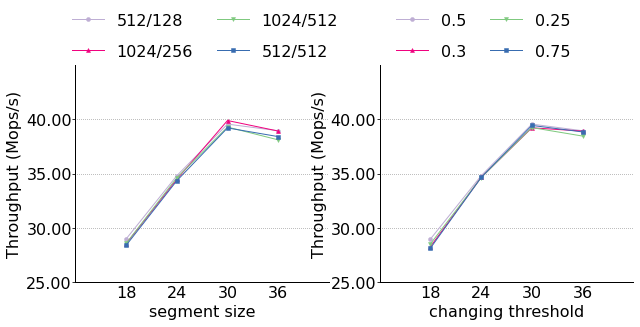

In [201]:
''' Ploting script '''
pp, fig = easypyplot.pdf.plot_setup(fig_path + fig_name, fig_dims)
# ax = fig.gca() # Only used with no subplot mode

''' segment size '''
fig_ax = fig.add_subplot(1, 2, 1) # Knob: plot the first subgraph of a 1x1 grid, i.e., no subplot mode
easypyplot.format.turn_off_box(fig_ax)

fig_SEGS_h = []
for group_id in range(len(workload_dict_SEGS)):
    fig_SEGS_h += fig_ax.plot(fig_xticks_SEGS, fig_data_SEGS[group_id],
                marker=fig_marker[group_id],
                linewidth = '1.0',
                color=fig_colors[group_id],
                )

''' x axis '''
fig_ax.xaxis.set_tick_params(pad=0) # Knob: distance between x tick label and x-axis
fig_ax.set_xlim([fig_ax.get_xticks()[0] - 0.5, fig_ax.get_xticks()[-1] + 0.5])
fig_ax.set_xticks(fig_xticks_SEGS)
fig_ax.set_xticklabels(fig_xlabels_SEGS, fontsize=fig_label_fontsize, fontproperties=ft)
fig_ax.xaxis.set_ticks_position('none') # Knob: uncomment for visible x ticks
# ax.tick_params(direction='in') # Knob: [in, out, inout]
# ax.set_xlabel(fig_title) # Knob: the overall x label text
fig_ax.set_xlabel('segment size', fontproperties=ft)

''' y axis '''
fig_ax.yaxis.set_tick_params(pad=0) # Knob: distance between y tick label and y-axis
# easypyplot.format.set_axis_to_percent(fig_ax.yaxis) # Uncomment for y axis tick label in xx% format
fig_ax.yaxis.grid(True)
fig_ax.set_ylim(fig_ylim)
fig_ax.set_yticks(fig_yticks)
fig_yticks_label = ["{:.2f}".format(item) for item in fig_yticks] # Change for customized y tick label text
fig_ax.set_yticklabels(fig_yticks_label, fontproperties=ft)
fig_ax.set_ylabel(fig_title, multialignment='center', fontproperties=ft)

''' legend '''
SEGS_legend = [workload_dict_SEGS[item] for item in workload_dict_SEGS]
fig.legend(fig_SEGS_h, SEGS_legend, loc='upper left', frameon=False, prop=ft,
        bbox_to_anchor=(0.1, 1.11),
        ncol=2,
        numpoints=1,
        columnspacing=1.5, # padding between columns
        labelspacing=1, # padding between rows
        )

''' changing thershold '''
fig_ax = fig.add_subplot(1, 2, 2) # Knob: plot the first subgraph of a 1x1 grid, i.e., no subplot mode
easypyplot.format.turn_off_box(fig_ax)

fig_THR_h = []
for group_id in range(len(workload_dict_THR)):
    fig_THR_h += fig_ax.plot(fig_xticks_THR, fig_data_THR[group_id],
                marker=fig_marker[group_id],
                linewidth = '1.0',
                color=fig_colors[group_id],
                )

''' x axis '''
fig_ax.xaxis.set_tick_params(pad=0) # Knob: distance between x tick label and x-axis
fig_ax.set_xlim([fig_ax.get_xticks()[0] - 0.5, fig_ax.get_xticks()[-1] + 0.5])
fig_ax.set_xticks(fig_xticks_THR)
fig_ax.set_xticklabels(fig_xlabels_THR, fontsize=fig_label_fontsize, fontproperties=ft)
fig_ax.xaxis.set_ticks_position('none') # Knob: uncomment for visible x ticks
# ax.tick_params(direction='in') # Knob: [in, out, inout]
# ax.set_xlabel(fig_title) # Knob: the overall x label text
fig_ax.set_xlabel('changing threshold', fontproperties=ft)

''' y axis '''
fig_ax.yaxis.set_tick_params(pad=0) # Knob: distance between y tick label and y-axis
# easypyplot.format.set_axis_to_percent(fig_ax.yaxis) # Uncomment for y axis tick label in xx% format
fig_ax.yaxis.grid(True)
fig_ax.set_ylim(fig_ylim)
fig_ax.set_yticks(fig_yticks)
fig_yticks_label = ["{:.2f}".format(item) for item in fig_yticks] # Change for customized y tick label text
fig_ax.set_yticklabels(fig_yticks_label, fontproperties=ft)
fig_ax.set_ylabel(fig_title, multialignment='center', fontproperties=ft)

''' legend '''
THR_legend = [workload_dict_THR[item] for item in workload_dict_THR]
fig.legend(fig_THR_h, THR_legend, loc='upper left', frameon=False, prop=ft,
        bbox_to_anchor=(0.55, 1.11),
        ncol=2,
        numpoints=1,
        columnspacing=1.5, # padding between columns
        labelspacing=1, # padding between rows
        )

''' last resize '''
# plt.tight_layout()
# easypyplot.format.resize_ax_box(fig_ax, hratio=0.5)

In [202]:
''' Save figures'''
fig.savefig(fig_path + fig_name+'.pdf', format="pdf", bbox_inches = 'tight')
# easypyplot.pdf.plot_teardown(pp) # BUG: it sometimes generates wierd chopped pdf figures
# fig.savefig(fig_name+'.svg', format="svg", bbox_inches = 'tight', transparent=False) # svg format